In [1]:
# imports from Qiskit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import random
import numpy as np

In [2]:
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# imports from backend providers (IBM for superconductor, AQT for trapped ion)
from qiskit.providers.ibmq import IBMQ

ibmq_provider = IBMQ.load_account()        # credentials stored on disk
ibmq_simulator = ibmq_provider.get_backend('ibmq_qasm_simulator')
ibmq_device = ibmq_provider.get_backend('ibmq_burlington')

# simple function that applies a series of unitary gates from a given string
def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger):
    functionmap = {
                    'x':quantum_circuit.x,
                    'y':quantum_circuit.y,
                    'z':quantum_circuit.z,
                    'h':quantum_circuit.h,                    
                    't':quantum_circuit.t,                    
    }
    if dagger: functionmap['t'] = quantum_circuit.tdg
    
    if dagger:
        [functionmap[unitary](qubit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]

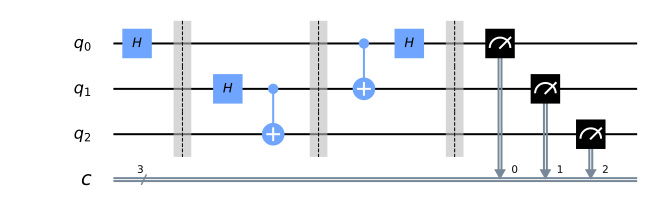

In [3]:
secret_unitary = 'h'
n = 3
qc1 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc1.qubits[0], qc1, dagger = 0)
qc1.barrier()
qc1.h(1)
qc1.cx(1,2)
qc1.barrier()
qc1.cx(0,1)
qc1.h(0)
qc1.barrier()
qc1.measure([0,1,2],[0,1,2])
qc1.draw(output='mpl')

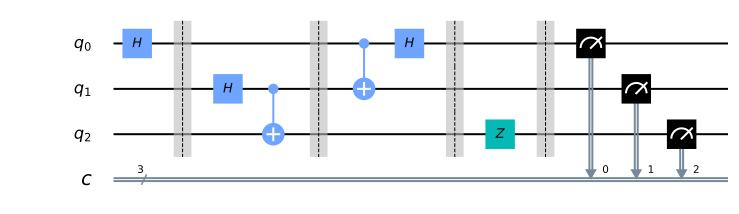

In [4]:
qc2 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc2.qubits[0], qc2, dagger = 0)
qc2.barrier()
qc2.h(1)
qc2.cx(1,2)
qc2.barrier()
qc2.cx(0,1)
qc2.h(0)
qc2.barrier()
qc2.z(2)
qc2.barrier()
qc2.measure([0,1,2],[0,1,2])
qc2.draw(output='mpl')

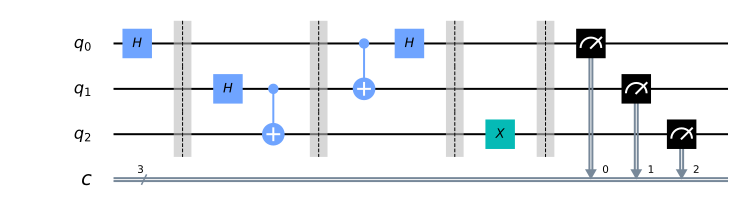

In [5]:
qc3 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc3.qubits[0], qc3, dagger = 0)
qc3.barrier()
qc3.h(1)
qc3.cx(1,2)
qc3.barrier()
qc3.cx(0,1)
qc3.h(0)
qc3.barrier()
qc3.x(2)
qc3.barrier()
qc3.measure([0,1,2],[0,1,2])
qc3.draw(output='mpl')

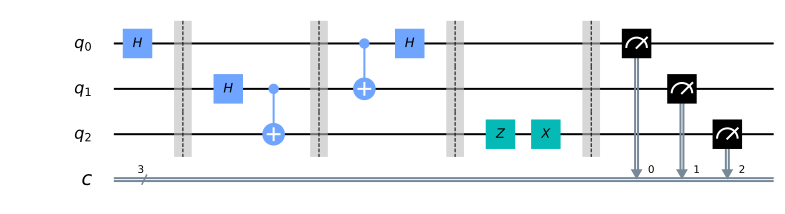

In [6]:
qc4 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc4.qubits[0], qc4, dagger = 0)
qc4.barrier()
qc4.h(1)
qc4.cx(1,2)
qc4.barrier()
qc4.cx(0,1)
qc4.h(0)
qc4.barrier()
qc4.z(2)
qc4.x(2)
qc4.barrier()
qc4.measure([0,1,2],[0,1,2])
qc4.draw(output='mpl')

In [7]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

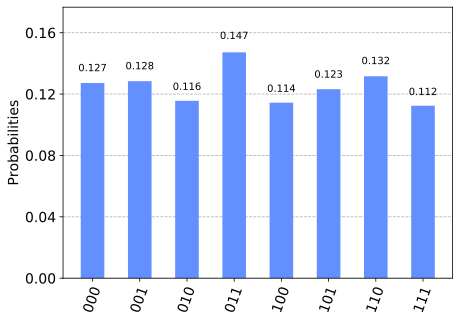

{'101': 308, '010': 289, '011': 368, '000': 318, '110': 329, '100': 286, '001': 321, '111': 281}
Done


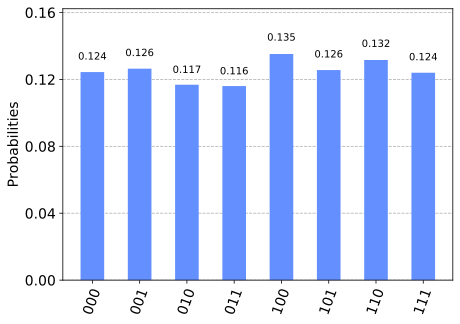

{'101': 314, '010': 292, '011': 290, '000': 311, '110': 329, '100': 338, '001': 316, '111': 310}
Done


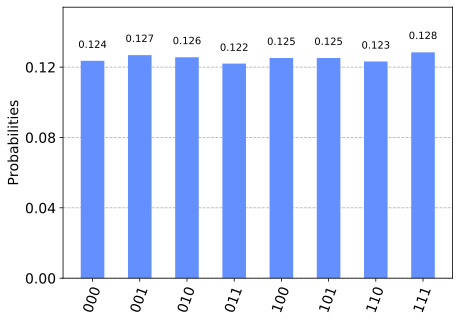

{'101': 313, '010': 314, '011': 305, '000': 309, '110': 308, '100': 313, '001': 317, '111': 321}
Done


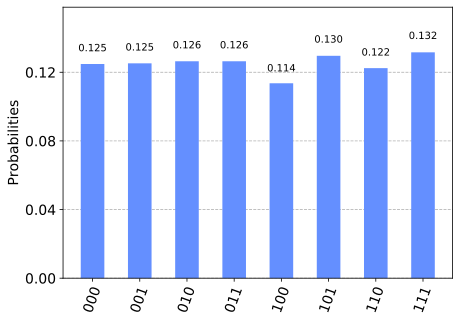

{'101': 324, '010': 316, '011': 316, '000': 312, '110': 306, '100': 284, '001': 313, '111': 329}
Done


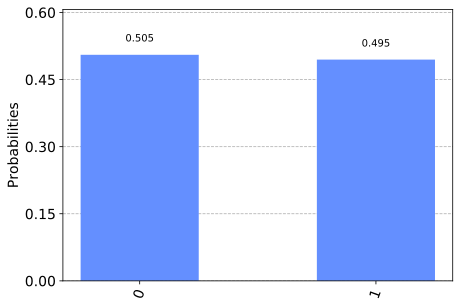

Job Status: job has successfully run


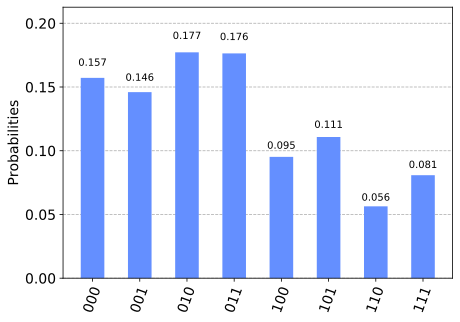

{'101': 277, '010': 443, '011': 441, '000': 393, '110': 141, '100': 238, '001': 365, '111': 202}
Done
Job Status: job has successfully run


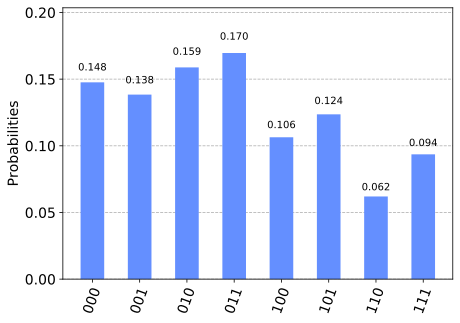

{'101': 309, '010': 397, '011': 424, '000': 369, '110': 155, '100': 266, '001': 346, '111': 234}
Done
Job Status: job has successfully run


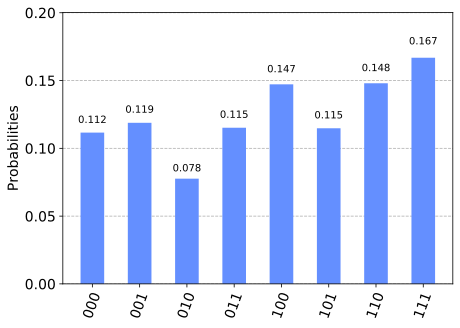

{'101': 287, '010': 194, '011': 288, '000': 279, '110': 370, '100': 368, '001': 297, '111': 417}
Done
Job Status: job has successfully run


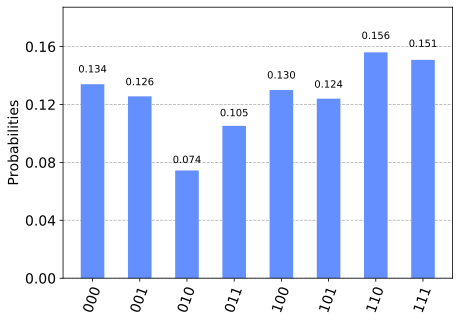

{'101': 310, '010': 186, '011': 263, '000': 335, '110': 390, '100': 325, '001': 314, '111': 377}
Done


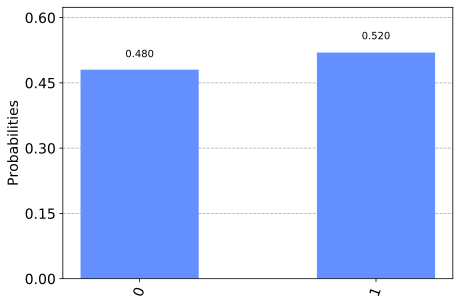

In [8]:
# transpile, plot circuit, run, plot result
backends = [ibmq_simulator, ibmq_device]

qcs = [qc1, qc2, qc3, qc4]
for be in backends:
    for qc in qcs:
        job = execute(qc, backend = be, shots=2500)
        if be == ibmq_device:
            job_monitor(job)
        bits = [ '100', '000', '111', '101', '011', '001', '110', '010']
        if qc == qc1:
            counts1 = job.result().get_counts()
            plot_histogram(counts1)
            for bit in bits:
                if bit not in counts1:
                    counts1[bit] = 0
            print(counts1)
        if qc == qc2:
            counts2 = job.result().get_counts()
            plot_histogram(counts2)
            for bit in bits:
                if bit not in counts2:
                    counts2[bit] = 0
            print(counts2)
        if qc == qc3:
            counts3 = job.result().get_counts()
            plot_histogram(counts3)
            for bit in bits:
                if bit not in counts3:
                    counts3[bit] = 0
            print(counts3)
        if qc == qc4:
            counts4 = job.result().get_counts()
            plot_histogram(counts4)
            for bit in bits:
                if bit not in counts4:
                    counts4[bit] = 0
            print(counts4)
        print('Done')
        ibmq_sim_results = job.result()
        ibmq_sim_counts = job.result().get_counts()
    if be == ibmq_simulator:
        countssim = {'0': counts1["000"]+counts2["001"]+counts3["010"]+counts4["011"],'1': counts1["100"]+counts2["101"]+counts3["110"]+counts4["111"]}
        plot_histogram(countssim)
    else:
        countsdev = {'0': counts1["000"]+counts2["001"]+counts3["010"]+counts4["011"],'1': counts1["100"]+counts2["101"]+counts3["110"]+counts4["111"]}
        plot_histogram(countsdev)
   


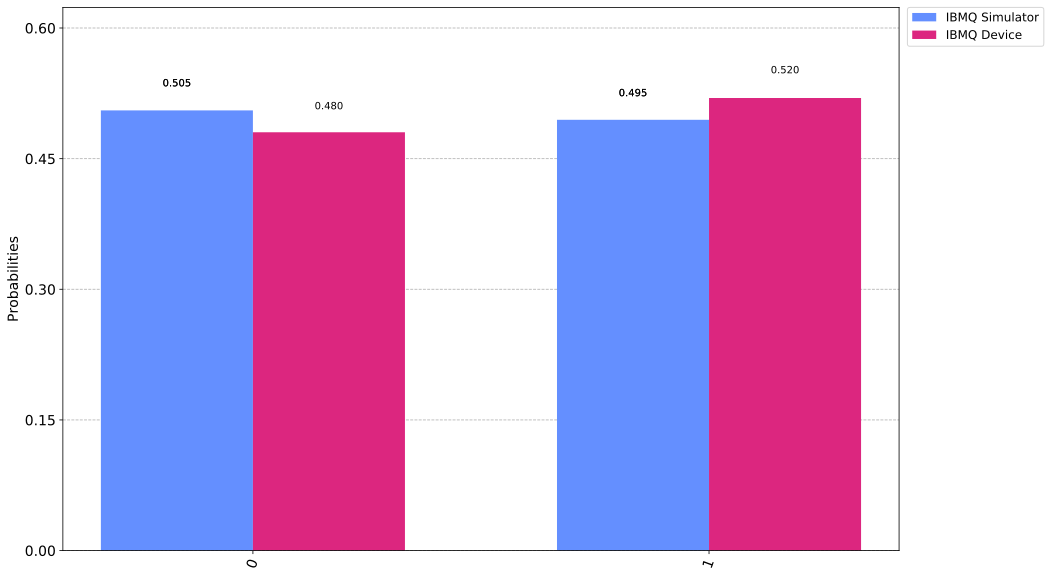

In [9]:
# plotting the results together
plot_histogram([countssim, countsdev],
               legend = ['IBMQ Simulator', 'IBMQ Device'],
               figsize = (15,10))